<a href="https://colab.research.google.com/github/ai7dnn/2024-1-BDA/blob/main/inclass/14w_self_study_lect_ch16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **빅데이터분석프로그래밍**
> 14주차 자기주도학습

# 파이썬 설치 확인

In [ ]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [ ]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(msno.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1
0.5.2


# 코랩에서 한글 처리

In [ ]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 11.4 MB/s eta 0:00:00


## 그래프 설정

In [ ]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [4, 2.5]})      # 그림 크기, 기본값 [6, 4]

In [ ]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

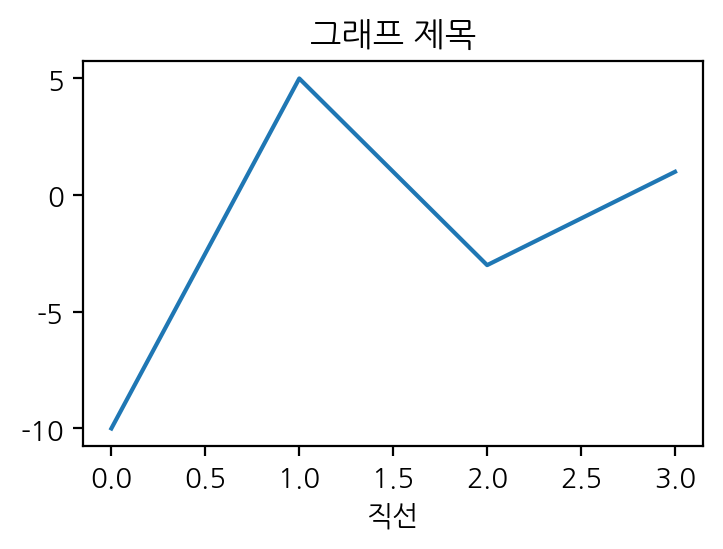

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

## 수업에서 사용할 데이터를 다음 깃에서 복사
- https://github.com/ai7dnn/data.git

> #### 수업에서 파일 사용 시
> - 현재 하부 폴더: data
> - 파일: data/파일이름

In [ ]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 46 (delta 7), reused 7 (delta 1), pack-reused 0
Receiving objects: 100% (46/46), 4.59 MiB | 4.73 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


## 데이터프레임 가로로 여러 개 출력하기

In [ ]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [ ]:
display_side_by_side(exam.head(3), exam[['id', 'math', 'english']].head(3))

id 
 nclass 
 math 
 english 
 science 
 
 
 
 
 0 
 1 
 1 
 50 
 98 
 50 
 
 
 1 
 2 
 1 
 60 
 97 
 60 
 
 
 2 
 3 
 1 
 45 
 86 
 78 
 
 
      
 
 
 
 id 
 math 
 english 
 
 
 
 
 0 
 1 
 50 
 98 
 
 
 1 
 2 
 60 
 97 
 
 
 2 
 3 
 45 
 86

# **여섯째마당. 한발 더 들어가기**

---
---


# 16 데이터를 추출하는 다양한 방법

## 16-1 `[]` 이용하기

### 조건을 충족하는 행 추출하기

In [ ]:
import pandas as pd
df_raw = pd.read_csv('data/exam.csv')
df = df_raw.head(10)
df

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [ ]:
# nclass 추출
df['nclass']

0    1
1    1
2    1
3    1
4    2
5    2
6    2
7    2
8    3
9    3
Name: nclass, dtype: int64

In [ ]:
# nclass가 1인지 확인
df['nclass'] == 1

0     True
1     True
2     True
3     True
4    False
5    False
6    False
7    False
8    False
9    False
Name: nclass, dtype: bool

In [ ]:
# nclass가 1이면 추출
df[df['nclass'] == 1]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [ ]:
# 수학 점수가 80점 이상이면 추출
df[df['math'] >= 80]

,id,nclass,math,english,science
6,7,2,80,90,45
7,8,2,90,78,25


In [ ]:
# nclass가 1이면서 수학 점수가 50점 이상
df[(df['nclass'] == 1) & (df['math'] >= 50)]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [ ]:
# 수학 점수가 50점 미만이거나 영어 점수가 50점 미만
df[(df['math'] < 50) | (df['english'] < 50)]

,id,nclass,math,english,science
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
8,9,3,20,98,15


### 열 추출하기

In [ ]:
df['id']

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: id, dtype: int64

In [ ]:
df['nclass']

0    1
1    1
2    1
3    1
4    2
5    2
6    2
7    2
8    3
9    3
Name: nclass, dtype: int64

In [ ]:
df[['id', 'nclass']]

,id,nclass
0,1,1
1,2,1
2,3,1
3,4,1
4,5,2
5,6,2
6,7,2
7,8,2
8,9,3
9,10,3


#### 열이 1개일 때 데이터 프레임 자료 구조 유지하기

In [ ]:
# 시리즈로 추출
df['id']

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: id, dtype: int64

In [ ]:
# 데이터 프레임으로 추출
df[['id']]

,id
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


------------------------------------------------------------------------

#### (알아 두면 좋아요) `.`을 이용해 변수를 간단하게 추출하기

In [ ]:
# []를 이용해 변수 추출
df['math']

0    50
1    60
2    45
3    30
4    25
5    50
6    80
7    90
8    20
9    50
Name: math, dtype: int64

In [ ]:
# .을 이용해 변수 추출
df.math

0    50
1    60
2    45
3    30
4    25
5    50
6    80
7    90
8    20
9    50
Name: math, dtype: int64

In [ ]:
df['math'].mean()

50.0

In [ ]:
df.math.mean()

50.0

------------------------------------------------------------------------

### 조건을 충족하는 행에서 열 추출하기

In [ ]:
# nclass가 1인 행의 math 열
df[df['nclass'] == 1]['math']

0    50
1    60
2    45
3    30
Name: math, dtype: int64

In [ ]:
# nclass가 1인 행의 math, english 열
df[df['nclass'] == 1][['math', 'english']]

,math,english
0,50,98
1,60,97
2,45,86
3,30,98


------------------------------------------------------------------------

#### (알아 두면 좋아요) `[]`를 `pandas` 함수와 함께 사용하기

In [ ]:
# pandas 함수만 사용
df.groupby('nclass') \
  .agg(math    = ('math', 'mean'),
       english = ('english', 'mean'))

,math,english
nclass,,
1,46.25,94.75
2,61.25,84.25
3,35.00,98.00


In [ ]:
# pandas 함수와 [] 함께 사용
df.groupby('nclass')[['math', 'english']].mean()

,math,english
nclass,,
1,46.25,94.75
2,61.25,84.25
3,35.00,98.00


------------------------------------------------------------------------

## 16-2 `df.loc[]` 이용하기

### 인덱스 활용하기

In [ ]:
df = pd.DataFrame({'var1' : [1, 2, 3],
                   'var2' : [4, 5, 6]})
df

,var1,var2
0,1,4
1,2,5
2,3,6


In [ ]:
# 인덱스 문자열 지정하기
df = pd.DataFrame({'var1' : [1, 2, 3],
                   'var2' : [4, 5, 6]},
                   index = ['kim', 'lee', 'park'])
df

,var1,var2
kim,1,4
lee,2,5
park,3,6


### 인덱스 문자열을 지정해 행 추출하기

In [ ]:
# kim 행 추출
df.loc['kim']

var1    1
var2    4
Name: kim, dtype: int64

#### 여러 행 추출하기

In [ ]:
# kim, park 행 추출
df.loc[['kim', 'park']]

,var1,var2
kim,1,4
park,3,6


### 인덱스 문자열을 지정해 열 추출하기

In [ ]:
# lee 행의 var1 열 추출
df.loc['lee', 'var1']

2

In [ ]:
# kim, lee 행의 var2 열 추출
df.loc[['kim', 'lee'], 'var2']

kim    4
lee    5
Name: var2, dtype: int64

In [ ]:
df.loc[, 'var1']

SyntaxError: invalid syntax (<ipython-input-42-b3d7e9fb6647>, line 1)

In [ ]:
df.loc[:, 'var1']

kim     1
lee     2
park    3
Name: var1, dtype: int64

### 인덱스 번호를 지정해 행 추출하기

In [ ]:
# 인덱스 번호가 있는 데이터 프레임
df = df_raw.copy()
df

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [ ]:
# 0행 추출
df.loc[0]

id          1
nclass      1
math       50
english    98
science    50
Name: 0, dtype: int64

In [ ]:
# 2행 추출
df.loc[2]

id          3
nclass      1
math       45
english    86
science    78
Name: 2, dtype: int64

#### 행이 1개일 때 데이터 프레임 자료 구조 유지하기

In [ ]:
# 시리즈로 추출
df.loc[0]

id          1
nclass      1
math       50
english    98
science    50
Name: 0, dtype: int64

In [ ]:
# 데이터 프레임으로 추출
df.loc[[0]]

,id,nclass,math,english,science
0,1,1,50,98,50


#### 여러 행 추출하기

In [ ]:
# 1, 3, 5행 추출
df.loc[[0, 3, 5]]

,id,nclass,math,english,science
0,1,1,50,98,50
3,4,1,30,98,58
5,6,2,50,89,98


#### 연속된 행 추출하기

In [ ]:
# 0~3행 추출
df.loc[0:3]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [ ]:
# 7~9행 추출
df.loc[7:9]

,id,nclass,math,english,science
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [ ]:
# 0~2행 추출
df.loc[0:2]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78


In [ ]:
# 첫 번째 행 ~ 2행 추출
df.loc[:2]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78


In [ ]:
# 5~9행 추출
df.loc[5:9]

,id,nclass,math,english,science
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [ ]:
# 5행 ~ 마지막 행 추출
df.loc[5:]

,id,nclass,math,english,science
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12
14,15,4,75,56,78


In [ ]:
# 첫 번째 행 ~ 마지막 행 추출
df.loc[:]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [ ]:
df

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


#### 인덱스 문자열만 있으면 인덱스 번호로 행을 추출할 수 없다

In [ ]:
# 인덱스 문자열이 있는 데이터 프레임
df_label = pd.DataFrame({'var1' : [1, 2, 3],
                         'var2' : [4, 5, 6]},
                         index = ['kim', 'lee', 'park'])
df_label

,var1,var2
kim,1,4
lee,2,5
park,3,6


In [ ]:
df_label.loc['kim']

var1    1
var2    4
Name: kim, dtype: int64

In [ ]:
# 인덱스 번호로 행 추출하기
df_label.loc[0]

KeyError: 0

#### 인덱스 번호로 열을 추출할 수 없다

In [ ]:
# 인덱스 번호로 행 추출하기
df.loc[2, :]

id          3
nclass      1
math       45
english    86
science    78
Name: 2, dtype: int64

In [ ]:
# 인덱스 번호로 열 추출하기
df.loc[:, 2]

KeyError: 2

### 조건을 충족하는 행 추출하기

In [ ]:
df[df['nclass'] == 1]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [ ]:
# nclass가 1이면 추출
df.loc[df['nclass'] == 1]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [ ]:
# 수학 점수가 60점 이상이면 추출
df.loc[df['math'] >= 60]

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


#### 조건을 충족하는 행에서 열 추출하기

In [ ]:
# nclass가 1인 행의 math, english 열 추출
df.loc[df['nclass'] == 1, ['math', 'english']]

,math,english
0,50,98
1,60,97
2,45,86
3,30,98


In [ ]:
# 0~3행의 math 열 추출
df.loc[0:3, 'math']

0    50
1    60
2    45
3    30
Name: math, dtype: int64

#### 조건을 충족하는 행 추출 방법 비교하기

In [ ]:
# 수학 점수가 50을 초과하는 행 추출하기
# df.query('math > 50')    # df.query()
# df[df['math'] > 50]      # df[]
# df.loc[df['math'] > 50]  # df.loc[]

In [ ]:
df.query('math > 50')    # df.query()

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [ ]:
df[df['math'] > 50]      # df[]


,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [ ]:
df.loc[df['math'] > 50]  # df.loc[]

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


## 16-3 `df.iloc[]` 이용하기

### 인덱스 번호를 지정해 행 추출하기

In [ ]:
# 0행 추출
df.iloc[0]

id          1
nclass      1
math       50
english    98
science    50
Name: 0, dtype: int64

In [ ]:
# 2행 추출
df.iloc[2]

id          3
nclass      1
math       45
english    86
science    78
Name: 2, dtype: int64

#### 행이 1개일 때 데이터 프레임 자료 구조 유지하기

In [ ]:
# 시리즈로 추출
df.iloc[0]

id          1
nclass      1
math       50
english    98
science    50
Name: 0, dtype: int64

In [ ]:
# 데이터 프레임으로 추출
df.iloc[[0]]

,id,nclass,math,english,science
0,1,1,50,98,50


#### 여러 행 추출하기

In [ ]:
# 1, 3, 5행 추출
df.iloc[[0, 3, 5]]

,id,nclass,math,english,science
0,1,1,50,98,50
3,4,1,30,98,58
5,6,2,50,89,98


#### 연속된 행 추출하기

**`df.loc[x:y]` = x행 이상 y행 이하 추출**

In [ ]:
df.loc[1:5]  # 1~5행 출력

,id,nclass,math,english,science
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98


**`df.iloc[x:y]` = x행 이상 y행 미만 추출**

In [ ]:
df.iloc[1:5]  # 1~4행 출력

,id,nclass,math,english,science
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


#### 인덱스 문자열만 있어도 인덱스 번호로 행을 추출할 수 있다

In [ ]:
# 인덱스 문자열이 있는 데이터 프레임
df_label

,var1,var2
kim,1,4
lee,2,5
park,3,6


In [ ]:
df_label.loc[0]

KeyError: 0

In [ ]:
df_label.iloc[0]

var1    1
var2    4
Name: kim, dtype: int64

### 인덱스 번호를 지정해 열 추출하기

In [ ]:
# 모든 행의 1열 추출
df.iloc[:, 1]

0     1
1     1
2     1
3     1
4     2
5     2
6     2
7     2
8     3
9     3
10    3
11    3
12    4
13    4
14    4
15    4
16    5
17    5
18    5
19    5
Name: nclass, dtype: int64

In [ ]:
# 모든 행의 1, 3열 추출
df.iloc[:, [1, 3]]

,nclass,english
0,1,98
1,1,97
2,1,86
3,1,98
4,2,80
5,2,89
6,2,90
7,2,78
8,3,98
9,3,98


#### 인덱스 번호를 지정해 행, 열 추출하기

In [ ]:
# 2행의 3열 추출
df.iloc[2, 3]

86

In [ ]:
# 0, 1행의 2, 3열 추출
df.iloc[[0, 1], [2, 3]]

,math,english
0,50,98
1,60,97


#### 조건을 충족하는 행을 추출할 수 없다

In [ ]:
# nclass가 1이면 추출
df.iloc[df['nclass'] == 1]

NotImplementedError: iLocation based boolean indexing on an integer type is not available

#### `df.loc[]`와 `df.iloc[]`의 차이점

| 기능                    | df.loc()     | df.iloc()    |
|-------------------------|--------------|--------------|
| 행 추출 인덱스          | 문자열, 번호 | 번호         |
| 열 추출 인덱스          | 문자열       | 번호         |
| 조건 지정해서 행 추출   | O            | X            |
| 연속된 행 추출 x:y      | 이상:이하    | 이상:미만    |
  

---

### 정리하기

In [ ]:
## 1. [] 이용하기

df[df['math'] >= 80]                          # 조건을 충족하는 행 추출
df[(df['nclass'] == 1) & (df['math'] >= 50)]  # 여러 조건을 충족하는 행 추출

df[['id', 'nclass']]                          # 열 추출
df[df['nclass'] == 1]['math']                 # 조건을 충족하는 행에서 열 추출
df[df['nclass'] == 1][['math', 'english']]    # 조건을 충족하는 행에서 여러 열 추출


## 2. df.loc[] 이용하기

df.loc['kim']            # 인덱스 문자열로 행 추출
df.loc[['kim', 'park']]  # 인덱스 문자열로 여러 행 추출

df.loc[:, 'var1']        # 문자열로 열 추출
df.loc['lee', 'var1']    # 행, 열 모두 문자열로 추출

df.loc[0]                # 인덱스 번호로 행 추출
df.loc[[1, 3, 5]]        # 인덱스 번호로 여러 행 추출

df.loc[7:9]              # 연속된 행 추출: x행 이상 y행 이하
df.loc[:2]               # 첫 행부터 추출
df.loc[5:]               # 끝 행까지 추출
df.loc[:]                # 모든 행 추출

df.loc[df['math'] >= 60]                        # 조건을 충족하는 행 추출
df.loc[0:3, 'math']                             # 조건을 충족하는 행에서 열 추출
df.loc[df['nclass'] == 1, ['math', 'english']]  # 조건을 충족하는 행에서 여러 열 추출


## 3. df.iloc[] 이용하기

df.iloc[0]               # 인덱스 번호로 행 추출
df.iloc[1:5]             # 연속된 행 추출: x행 이상 y행 미만

df.iloc[:, 1]            # 인덱스 번호로 열 추출
df.iloc[2, 3]            # 행과 열을 모두 인덱스 번호로 추출
df.iloc[[0, 1], [2, 3]]  # 여러 행과 여러 열을 모두 인덱스 번호로 추출